In [18]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [19]:
DATA_DIR = os.path.join('data')

print (DATA_DIR)

data


In [20]:
all_data = pd.read_csv(os.path.join(DATA_DIR,'merged_data.csv'), index_col='id')
all_data.shape

(9590, 323)

In [21]:
all_data = all_data.drop('orgs', axis=1)
all_data = all_data.drop('ownerName', axis=1)
all_data = all_data.drop('userType', axis=1)
all_data = all_data.drop('ownerType', axis=1)
all_data = all_data[all_data['Java'].notnull()]
all_data = all_data[all_data['publicRepos'].notnull()]
print(all_data.shape)
all_data.head()

(8394, 319)


,publicRepos,stars,forks,Java,Shell,Groovy,TypeScript,JavaScript,Batchfile,Ruby,...,Tea,Shen,MQL4,BlitzMax,X10,Moocode,MQL5,NCL,ooc,Zimpl
id,,,,,,,,,,,,,,,,,,,,,
1,6.0,0.0,1.0,0.0,0.0,0.0,0.0,211510.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,28440350.0,96594.0,0.0,0.0,17185.0,96511.0,455289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,2.0,6.0,58032.0,0.0,0.0,0.0,3638901.0,1040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,114.0,116.0,50.0,18355867.0,2992731.0,66285.0,170462.0,9169679.0,43361.0,33743.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,68.0,62.0,20.0,460567.0,67077.0,2401.0,42413.0,20753734.0,1104.0,1252706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
features = all_data.drop('stars', axis=1)
outcome = np.ravel(all_data[['stars']])

In [11]:
scaler = MinMaxScaler()
model = RandomForestRegressor()
pipe = make_pipeline(scaler, model)
param_grid = { 'randomforestregressor__n_estimators':[100],
              'randomforestregressor__max_features':['auto'],
              'randomforestregressor__max_depth':[None],
              'randomforestregressor__min_samples_split':[4],
              'randomforestregressor__random_state':[11]
             }
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=6, cv=5)
grid.fit(features, outcome)
print(grid.best_params_)
print(grid.best_score_)
grid_preds = grid.predict(features)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__random_state': 11}
-73360282.1565


In [27]:
train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, random_state=11)
test_model = RandomForestRegressor(n_estimators=100, min_samples_split=4, random_state=11)
test_scaler = MinMaxScaler().fit(features)
test_fit = test_model.fit(test_scaler.transform(train_features), train_outcome)
test_preds = test_fit.predict(test_scaler.transform(test_features))
print(mean_squared_error(test_outcome, test_preds))
print(test_model.feature_importances_)

1098774.96527
[  8.12003520e-03   8.09823229e-01   7.10840104e-04   5.01051126e-04
   1.24779124e-03   2.76981259e-04   3.64398006e-04   6.14697567e-04
   3.10892459e-03   3.77732058e-04   2.46279079e-04   4.03049916e-04
   2.11528883e-03   1.35838828e-03   2.26875186e-04   1.37777019e-04
   1.70866443e-03   2.80344442e-04   1.14107808e-05   3.81215296e-04
   5.95334028e-04   2.09797227e-03   1.11944601e-03   8.24543396e-04
   1.11822746e-04   2.89342919e-04   1.21533092e-06   5.10603447e-04
   7.52326187e-04   1.31558975e-05   1.86456611e-06   7.26668479e-05
   3.69101509e-02   4.71527045e-06   1.60032461e-03   3.00615274e-03
   1.26318922e-04   2.71549393e-03   2.31239204e-03   1.07119634e-03
   5.82233006e-04   3.86869885e-04   1.73316790e-04   1.60351116e-04
   3.34672205e-05   9.62653646e-07   8.35313241e-05   6.20832775e-05
   1.34921418e-03   7.12004861e-05   2.48896786e-04   1.43547087e-03
   1.21893331e-04   5.58154448e-05   2.97405417e-05   1.64387552e-04
   3.85286566e-06   

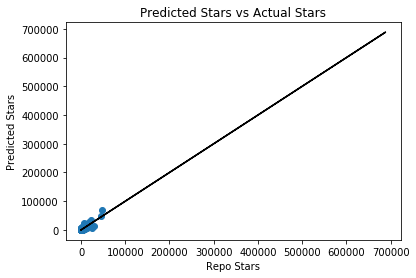

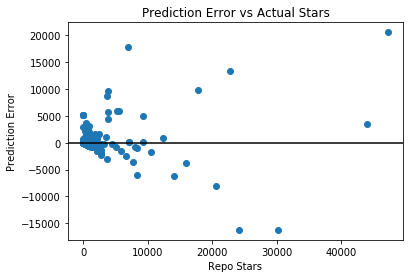

In [28]:
plt.scatter(test_outcome, test_preds)
plt.title('Predicted Stars vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Predicted Stars")
plt.plot(outcome, outcome, color='black')
plt.savefig("./pred_vs_actual.svg", format="svg")
plt.show()

plt.scatter(test_outcome, test_preds - test_outcome)
plt.title('Prediction Error vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Prediction Error")
plt.axhline(0, color='black')
plt.savefig("./pred_error.svg", format="svg")
plt.show()

In [29]:
output = pd.DataFrame(data={'Actual Stars':test_outcome, 'Predicted Stars':test_preds})
output

,Actual Stars,Predicted Stars
0,57.0,75.318119
1,32.0,162.862024
2,16.0,23.658095
3,16.0,9.003702
4,231.0,819.586246
5,107.0,47.982750
6,636.0,2185.226075
7,2.0,2.602500
8,1.0,0.556476
9,4.0,2.147845


In [30]:
output.to_csv(os.path.join(DATA_DIR,'output.csv'))